# Demo: Dataset introduction
 
This is an introduction to get started with the MetObs toolkit. These examples are making use of the demo data files that come with the toolkit.
Once the MetObs toolkit package is installed, you can import its functionality by:

In [1]:
import sys
repodir = '/home/thoverga/Documents/VLINDER_github/MetObs_toolkit'
sys.path.insert(0, str(repodir))
import metobs_toolkit 

metobs_toolkit.__version__

INFO:<metobs_toolkit>:FileHandler set at 2025-04-17 08:01:17.365574
INFO:metobs_toolkit:Logger initiated


'0.4.0a'

## The Dataset

A dataset is a collection of `Station`'s and all the data and metadata they hold. Most of the methods are
applied directly to a dataset. 

Start by creating an empty Dataset object:

In [2]:
your_dataset = metobs_toolkit.Dataset()
print(your_dataset) #prints out minimal info of your dataset

Dataset instance


In [3]:
your_dataset.get_info()

Dataset instance without observation records.
 --- Observational info ---


 --- Metadata info ---




## Importing data

To import your data into a Dataset, you can provide:

* (optional) data file: This is the CSV file containing the observations
* (optional) metadata file: The CSV file containing metadata for all stations.
* (required) template file: This is a (json) file that is used to interpret your data, and metadata file (if present).

In practice, you need to **start by creating a template file** for your data. More information on creating the template can be found in the documentation (under [Mapping to the toolkit](https://metobs-toolkit.readthedocs.io/en/latest/topics/template_mapping.html)).

TIP: *Use the `build_template_prompt()` of the toolkit for creating a template file.*


In [4]:
# metobs_toolkit.build_template_prompt()

To import data, you must specify the paths to your data, metadata and template.
For this example, we use the demo data, metadata and template that come with the toolkit.

In [5]:
your_dataset.import_data_from_file(
        input_data_file=metobs_toolkit.demo_datafile, # path to the data file
        input_metadata_file=metobs_toolkit.demo_metadatafile,
        template_file=metobs_toolkit.demo_template,
        )

your_dataset

INFO:/home/thoverga/Documents/VLINDER_github/MetObs_toolkit/metobs_toolkit/dataset.py:Reading the templatefile
INFO:/home/thoverga/Documents/VLINDER_github/MetObs_toolkit/metobs_toolkit/io_collection/dataparser.py:Initializing DataParser with <metobs_toolkit.io_collection.filereaders.CsvFileReader object at 0x7fda7c1d77f0> and <metobs_toolkit.template.Template object at 0x7fda7c10b340>.
INFO:/home/thoverga/Documents/VLINDER_github/MetObs_toolkit/metobs_toolkit/io_collection/dataparser.py:Entering parse method of <metobs_toolkit.io_collection.dataparser.DataParser object at 0x7fda66f2c250>.
DEBUG:metobs_toolkit.io_collection.filereaders:Reading /home/thoverga/Documents/VLINDER_github/MetObs_toolkit/metobs_toolkit/datafiles/demo_datafile.csv to Dataframe.
DEBUG:/home/thoverga/Documents/VLINDER_github/MetObs_toolkit/metobs_toolkit/io_collection/dataparser.py:Raw data read successfully.
DEBUG:/home/thoverga/Documents/VLINDER_github/MetObs_toolkit/metobs_toolkit/io_collection/dataparser.py:

Instance of Dataset at 0x7fda7c10afe0

## Inspecting the Template

In practice, you need to start by creating a template file for your data. The role of the template is to translate your data and metadata file, to a standard structure and units used by the toolkit. It is therefore only used when importing data.

The template is read, and stored as an attribute of your `Dataset`. In pracktice you do not have to interact with it, but if somehting unexpected happens when reading in the data it can be usefull to investigate the template (as a file) or by using the `Dataset.template.get_info()` method.


In [6]:
your_dataset.template.get_info()

------ Data obstypes map ---------
 * temp            <---> Temperatuur    
     (raw data in degC)
     (description: 2mT passive)

 * humidity        <---> Vochtigheid    
     (raw data in percent)
     (description: 2m relative humidity passive)

 * wind_speed      <---> Windsnelheid   
     (raw data in km/h)
     (description: Average 2m  10-min windspeed)

 * wind_direction  <---> Windrichting   
     (raw data in degrees)
     (description: Average 2m  10-min windspeed,  ...)


------ Data extra mapping info ---------
 * name column (data) <---> Vlinder

------ Data timestamp map ---------
 * datetimecolumn  <---> None           
 * time_column     <---> Tijd (UTC)     
 * date_column     <---> Datum          
 * fmt             <---> %Y-%m-%d %H:%M:%S
 * Timezone        <---> UTC

------ Metadata map ---------
 * name            <---> Vlinder        
 * lat             <---> lat            
 * lon             <---> lon            
 * school          <---> school         


**TIP**: *the `get_info()` method works on all objects of the Metobs toolkit.*

## Inspecting the Data

To get an overview of the data stored in your Dataset you can use

In [7]:
print(your_dataset)

Dataset instance


Or you can use the `.get_info()` method to print out more details.

If you want to inspect the data in your Dataset directly, you can take a look at the .df and .metadf attributes

In [8]:
print(your_dataset.df.head())
# equivalent for the metadata
print(your_dataset.metadf.head())


                                              value label
datetime                  obstype  name                  
2022-09-01 00:00:00+00:00 humidity vlinder01   65.0    ok
                                   vlinder02   62.0    ok
                                   vlinder03   65.0    ok
                                   vlinder04   66.0    ok
                                   vlinder05   61.0    ok
                 lat       lon        school                  geometry
name                                                                  
vlinder01  50.980438  3.815763         UGent  POINT (3.81576 50.98044)
vlinder02  51.022379  3.709695         UGent   POINT (3.7097 51.02238)
vlinder03  51.324583  4.952109   Heilig Graf  POINT (4.95211 51.32458)
vlinder04  51.335522  4.934732   Heilig Graf  POINT (4.93473 51.33552)
vlinder05  51.052655  3.675183  Sint-Barbara  POINT (3.67518 51.05266)


### Inspecting a Station

If you are interested in one station, you can extract all the info for that one station from the dataset by:


In [9]:
favorite_station = your_dataset.get_station(stationname="vlinder02")

Favorite station now contains all the information of that one station. All methods that are applicable to a Dataset are also applicable to a Station. So to inspect your favorite station, you can:

In [10]:
print(favorite_station.show())

AttributeError: 'Station' object has no attribute 'show'

## Making timeseries plots

To make timeseries plots, use the following syntax to plot the *temperature* observations of the full Dataset:

In [ ]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None} #else the legend is cutoff in ipython inline plots

colormap: tab20, is not well suited to color 28 categories.


<Axes: title={'center': 'Temperatuur for all stations. '}, ylabel='temp (Celsius)'>

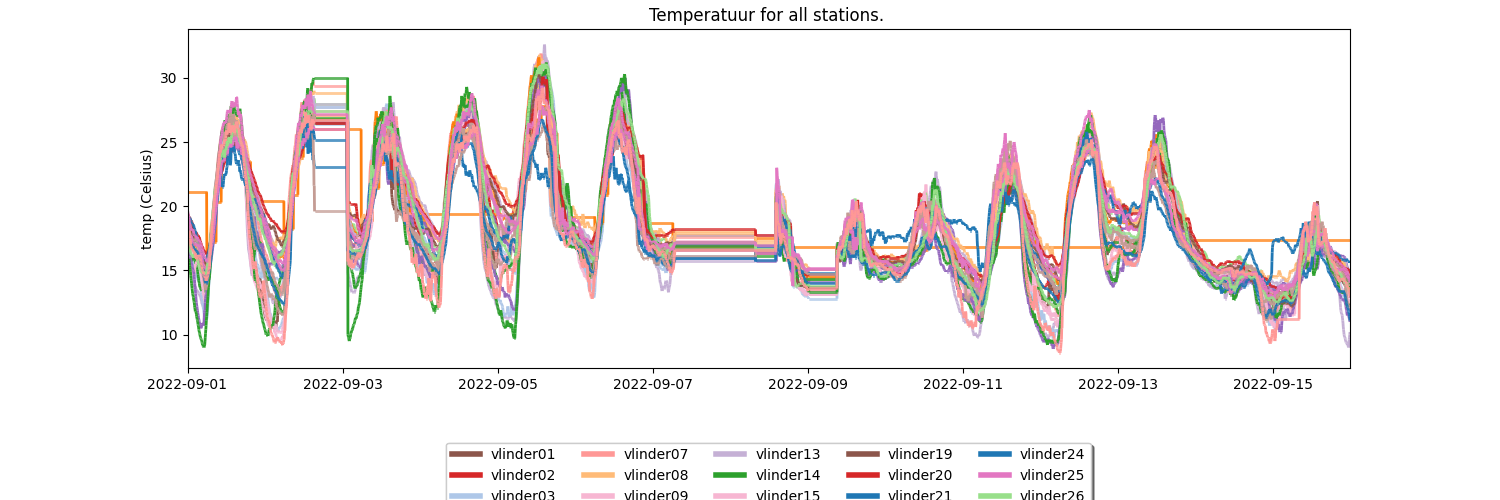

In [ ]:
your_dataset.make_plot(obstype='temp')

See the documentation of the ``make_plot()`` method for more details. Here is an example of commonly used arguments.

<Axes: title={'center': 'your custom title'}, xlabel='datetime', ylabel='humidity (%)'>

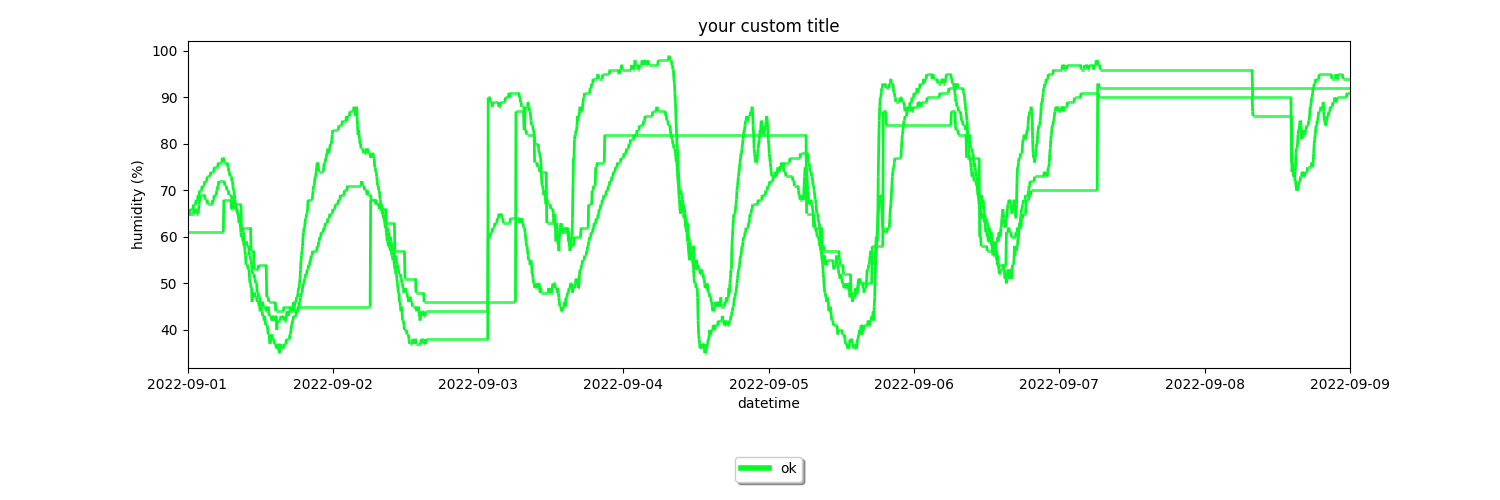

In [ ]:
#Import the standard datetime library to make timestamps from datetime objects
from datetime import datetime

your_dataset.make_plot(
    # specify the names of the stations in a list, or use None to plot all of them.
    stationnames=['vlinder01', 'vlinder03', 'vlinder05'],
    # what obstype to plot (default is 'temp')
    obstype="humidity",
    # choose how to color the timeseries:
    #'name' : a specific color per station
    #'label': a specific color per quality control label
    colorby="label",
    # choose a start and endtime for the series (datetime).
    # Default is None, which uses all available data
    starttime=None,
    endtime=datetime(2022, 9, 9),
    # Specify a title if you do not want the default title
    title='your custom title',
    # Add legend to plot?, by default true
    legend=True,
    # Plot observations that are labeled as outliers.
    show_outliers=True,
)

as mentioned above, one can apply the same methods to a Station object:

/home/thoverga/anaconda3/envs/metobs_dev/lib/python3.10/site-packages/metobs_toolkit/dataset_core.py:509: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combdf = pd.concat([df, outliersdf])  # combine the two


<Axes: title={'center': 'Temperatuur of vlinder02'}, xlabel='datetime', ylabel='temp (Celsius)'>

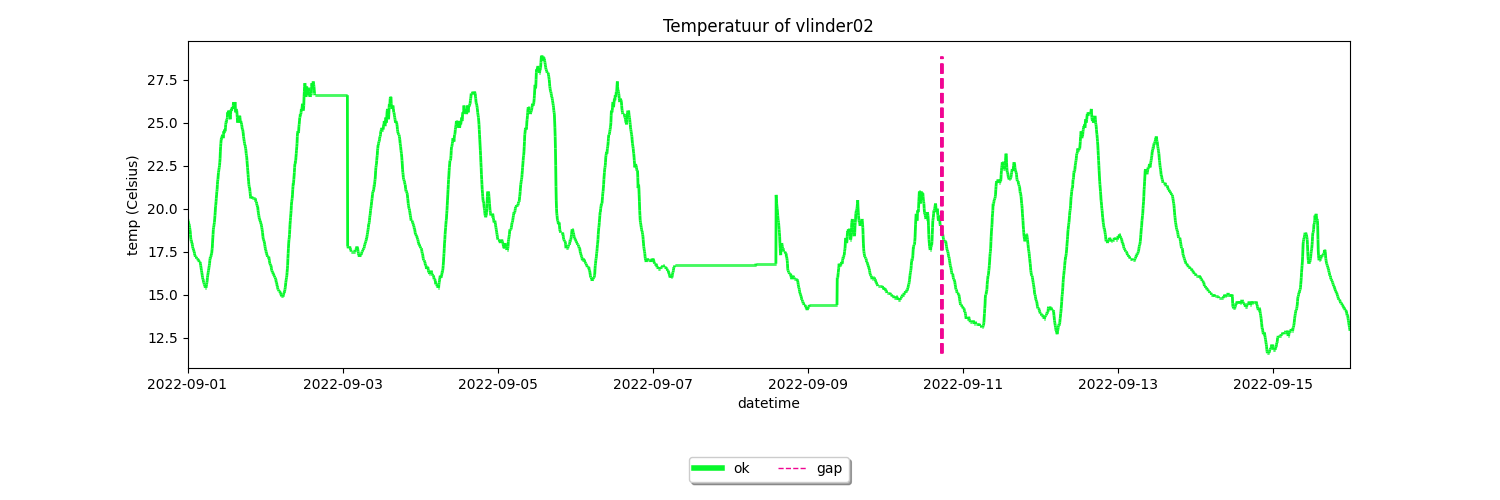

In [ ]:
favorite_station.make_plot(colorby='label')

## Resampling the time resolution

Coarsening the time resolution (i.g. frequency) of your data can be done by using the ``coarsen_time_resolution()``.

In [ ]:
your_dataset.coarsen_time_resolution(freq='30min') #'30min' means 30 minutes

your_dataset.df.head()

A 0 days 00:00:00 is given as an argument for a timedelta.


value
name      obstype  datetime                        
vlinder01 humidity 2022-09-01 00:00:00+00:00   65.0
                   2022-09-01 00:30:00+00:00   65.0
                   2022-09-01 01:00:00+00:00   65.0
                   2022-09-01 01:30:00+00:00   65.0
                   2022-09-01 02:00:00+00:00   68.0